* Data Processing: Use a provided sample dataset (CSV format) representing user activity, such as task completion times, app usage, or wellness metrics.
* Feature Engineering: Clean and preprocess the dataset to extract useful insights.
* Model Development: Build a classification or regression model to predict user task completion likelihood based on activity patterns.
* Model Evaluation: Evaluate the model using appropriate metrics (accuracy, precision, recall).
 Output: Generate predictions for a few sample user inputs and present the results.
* Expected Deliverables:
 Python project source code (shared via GitHub link or as a ZIP file).
* Short documentation (README) explaining the project structure and how to run it.
A brief report summarizing the model’s performance and any key insights.
* Submission Deadline: Please submit your assignment via email to mosesughabojor@gmail.com by 28/02/2025. Kindly also bring a copy of your project on the day of your interview.

# Interview Preparation:
 Alongside the assignment, we will conduct a technical interview where you’ll discuss your project and answer a few AI/ML-related questions. To help you prepare, here are some areas we may cover:
* How do you ensure the quality and integrity of training data?
* How would you build an AI model that runs efficiently on mobile devices?
* What steps do you take to avoid bias in machine learning predictions?
* How do you deploy and monitor a machine learning model in production?
* How would you optimize a model for real-time predictions?


    

In [ ]:
!pip install kagglehub

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import kagglehub
import requests
import os

In [ ]:
arashnic_fitbit_path = kagglehub.dataset_download('arashnic/fitbit')

print('Data source import complete.')

In [ ]:
import requests
import os

def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)
    return local_filename

# Example usage:
url = "https://www.kaggle.com/api/v1/datasets/download/arashnic/fitbit?dataset_version_number=2"
local_filename = "fitbit_data.zip"  # You can change the filename if needed

try:
  download_file(url, local_filename)
  print(f"File downloaded successfully as {local_filename}")
  # Now you can unzip and process the file as needed.
except requests.exceptions.RequestException as e:
  print(f"Error downloading file: {e}")

# Example to change directory (assuming you want to do this after download)
# import os
# os.chdir("/content/drive/MyDrive/Dexter_Cyberlab") # Replace with your actual path
# print(f"Current working directory changed to: {os.getcwd()}")


C:\Users\philip\Desktop\Dexter Cyberlab\data\mturkfitbit_export\Fitabasedata


In [ ]:
# prompt: unzip the data

import zipfile

try:
    with zipfile.ZipFile("fitbit_data.zip", 'r') as zip_ref:
        zip_ref.extractall("./data") # Extract to the desired directory
    print("Data extracted successfully!")
except FileNotFoundError:
    print("Error: fitbit_data.zip not found. Please ensure the file exists in the current directory.")
except zipfile.BadZipFile:
    print("Error: Invalid zip file. Please check the integrity of fitbit_data.zip.")


 Volume in drive C has no label.
 Volume Serial Number is 7CB5-B690

 Directory of C:\Users\philip\Desktop\Dexter Cyberlab\data\mturkfitbit_export\Fitabasedata

02/27/2025  12:07 AM    <DIR>          .
02/27/2025  12:07 AM    <DIR>          ..
02/27/2025  12:07 AM           111,288 dailyActivity_merged.csv
02/27/2025  12:07 AM            25,125 dailyCalories_merged.csv
02/27/2025  12:07 AM            70,581 dailyIntensities_merged.csv
02/27/2025  12:07 AM            25,175 dailySteps_merged.csv
02/27/2025  12:07 AM        89,588,303 heartrate_seconds_merged.csv
02/27/2025  12:07 AM           801,486 hourlyCalories_merged.csv
02/27/2025  12:07 AM           898,778 hourlyIntensities_merged.csv
02/27/2025  12:07 AM           796,562 hourlySteps_merged.csv
02/27/2025  12:07 AM        66,443,854 minuteCaloriesNarrow_merged.csv
02/27/2025  12:07 AM        22,993,081 minuteCaloriesWide_merged.csv
02/27/2025  12:07 AM        46,358,789 minuteIntensitiesNarrow_merged.csv
02/27/2025  12:07 AM   

In [ ]:
# List all files in the specified directory
all_files = os.listdir()

# Filter out only CSV files
csv_files = [file for file in all_files if file.endswith('.csv')]

directory = os.getcwd()

In [ ]:
# Loop through each CSV file
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Print the columns of the DataFrame
        print(f"Columns in {filename}:")
        print(df.columns)
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


In [ ]:
# Loop through each CSV file and display the first five rows
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Display the first five rows of the DataFrame
        display(filename)
        display(df.head())
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


#### To represent user activity, such as task completion times, app usage, or wellness metrics, I can use the following datasets:

##### 1. Activity Tracking & Movement Data
dailyActivity_merged.csv

* Key columns: TotalSteps, TotalDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories
* Use case: Provides an overview of daily movement, which can be used to analyze activity levels and engagement.
hourlySteps_merged.csv

* Key columns: ActivityHour, StepTotal
* Use case: Tracks user movement hourly, useful for identifying patterns in activity (e.g., peak movement hours).
minuteStepsNarrow_merged.csv

* Key columns: ActivityMinute, Steps
* Use case: Offers minute-level tracking of steps, which can be used to analyze specific moments of high or low activity.
##### 2. Caloric & Energy Expenditure Data
dailyCalories_merged.csv

* Key columns: Calories
* Use case: Can be used to track energy expenditure and link it with activity levels.
hourlyCalories_merged.csv

* Key columns: ActivityHour, Calories
* Use case: Provides an hourly breakdown of calorie burn, useful for understanding energy expenditure trends.
minuteCaloriesNarrow_merged.csv

* Key columns: ActivityMinute, Calories
* Use case: Granular tracking of calories burned, helping correlate energy usage with movement.
##### 3. Intensity & Engagement Metrics
dailyIntensities_merged.csv

* Key columns: VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
* Use case: Helps determine how engaged a user is in various levels of activity.
hourlyIntensities_merged.csv

* Key columns: ActivityHour, TotalIntensity, AverageIntensity
* Use case: Measures how intense a user's activity is on an hourly basis.
minuteIntensitiesNarrow_merged.csv

* Key columns: ActivityMinute, Intensity
* Use case: High-resolution tracking of intensity levels.
##### 4. Wellness & Sleep Data
sleepDay_merged.csv

* Key columns: TotalMinutesAsleep, TotalTimeInBed
* Use case: Helps track user sleep patterns, which are critical for wellness metrics.
minuteSleep_merged.csv

* Key columns: date, value|
* Use case: Provides minute-level sleep tracking.
weightLogInfo_merged.csv

* Key columns: WeightKg, BMI, Fat
* Use case: Can be used to monitor weight and BMI trends over time.
How to Use This Data for User Activity Representation

##### Task Completion Times

* Use step and intensity data (dailyActivity_merged.csv, minuteStepsNarrow_merged.csv, hourlyIntensities_merged.csv) to track when users are most active.
* Identify patterns where users complete tasks based on peak movement times.
App Usage

* If app usage correlates with movement, track activity minutes to infer user engagement times.
* Combine hourly intensity and calorie burn to analyze when users are most engaged.

##### Wellness Metrics

* Use sleep data (sleepDay_merged.csv) to determine sleep duration and quality.
* Analyze caloric burn and step data to infer physical activity trends.
* Incorporate weight and BMI (weightLogInfo_merged.csv) to measure long-term wellness trends.

In [153]:
# Load datasets
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
daily_calories = pd.read_csv("dailyCalories_merged.csv")
daily_intensities = pd.read_csv("dailyIntensities_merged.csv")
sleep_data = pd.read_csv("sleepDay_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")
weight_data = pd.read_csv("weightLogInfo_merged.csv")

In [154]:
# List of CSV files to process
csv_files = [
   "dailyActivity_merged.csv",
   "dailySteps_merged.csv",
   "dailyCalories_merged.csv",
   "dailyIntensities_merged.csv",
   "sleepDay_merged.csv",
   "hourlySteps_merged.csv",
   "weightLogInfo_merged.csv"
]

# Loop through each CSV file and display the first five rows
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Display the first five rows of the DataFrame
        display(df.head())
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


--------------------


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


--------------------


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


--------------------


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


--------------------


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


--------------------


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


--------------------


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


--------------------


In [ ]:
# Load datasets
daily_activity = pd.read_csv("dailyActivity_merged.csv")
daily_steps = pd.read_csv("dailySteps_merged.csv")
daily_calories = pd.read_csv("dailyCalories_merged.csv")
daily_intensities = pd.read_csv("dailyIntensities_merged.csv")
sleep_data = pd.read_csv("sleepDay_merged.csv")
hourly_steps = pd.read_csv("hourlySteps_merged.csv")
weight_data = pd.read_csv("weightLogInfo_merged.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

None

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


None

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


None

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


None

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


None

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


None

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


None

--------------------


In [ ]:
# List of CSV files to process
csv_files = [
   "dailyActivity_merged.csv",
   "dailySteps_merged.csv",
   "dailyCalories_merged.csv",
   "dailyIntensities_merged.csv",
   "sleepDay_merged.csv",
   "hourlySteps_merged.csv",
   "weightLogInfo_merged.csv"
]

# Loop through each CSV file and display the first five rows
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Display the first five rows of the DataFrame
        display(df.head())
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


--------------------


,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


--------------------


,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


--------------------


,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,2.424805e+09,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,4.445115e+09,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,6.962181e+09,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500
max,8.877689e+09,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000


--------------------


,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


--------------------


,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


--------------------


,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


--------------------


In [ ]:
# Loop through each CSV file and display the first five rows
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Display the first five rows of the DataFrame
        display(df.info())
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


'dailyActivity_merged.csv'

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

--------------------


'dailySteps_merged.csv'

Id             0
ActivityDay    0
StepTotal      0
dtype: int64

--------------------


'dailyCalories_merged.csv'

Id             0
ActivityDay    0
Calories       0
dtype: int64

--------------------


'dailyIntensities_merged.csv'

Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        0
FairlyActiveMinutes         0
VeryActiveMinutes           0
SedentaryActiveDistance     0
LightActiveDistance         0
ModeratelyActiveDistance    0
VeryActiveDistance          0
dtype: int64

--------------------


'sleepDay_merged.csv'

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

--------------------


'hourlySteps_merged.csv'

Id              0
ActivityHour    0
StepTotal       0
dtype: int64

--------------------


'weightLogInfo_merged.csv'

Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

--------------------


In [36]:
# Loop through each CSV file and display the first five rows
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Display the first five rows of the DataFrame
        display(df.describe())
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


--------------------


,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


--------------------


,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


--------------------


,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,2.424805e+09,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,4.445115e+09,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,6.962181e+09,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500
max,8.877689e+09,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000


--------------------


,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


--------------------


,Id,StepTotal
count,2.209900e+04,22099.000000
mean,4.848235e+09,320.166342
std,2.422500e+09,690.384228
min,1.503960e+09,0.000000
25%,2.320127e+09,0.000000
50%,4.445115e+09,40.000000
75%,6.962181e+09,357.000000
max,8.877689e+09,10554.000000


--------------------


,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,6.700000e+01,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,7.009282e+09,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,1.950322e+09,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,6.962181e+09,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,6.962181e+09,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,8.877689e+09,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,133.500000,294.317120,25.00000,47.540001,1.463098e+12


--------------------


In [ ]:
# Loop through each CSV file and display the first five rows
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Display the first five rows of the DataFrame
        display(filename)
        display(df.isnull().sum())
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


daily_activity Duplicate Rows: 0
daily_calories Duplicate Rows: 0
daily_intensities Duplicate Rows: 0
daily_steps Duplicate Rows: 0
weightLogInfo Duplicate Rows: 0
hourly_steps Duplicate Rows: 0
sleep_data Duplicate Rows: 3
weight_data Duplicate Rows: 0


In [159]:
# List of DataFrames
dataframes = [daily_activity, daily_calories, daily_intensities, daily_steps, df, hourly_steps, sleep_data, weight_data]
dataframe_names = ["daily_activity", "daily_calories", "daily_intensities", "daily_steps", "weightLogInfo", "hourly_steps", "sleep_data", "weight_data"]

# Loop through each DataFrame and display the column names
for name, df in zip(dataframe_names, dataframes):
    print(f"Columns in {name}:")
    print(df.columns.tolist())
    print("-" * 20)

Columns in daily_activity:
['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
--------------------
Columns in daily_calories:
['Id', 'ActivityDay', 'Calories']
--------------------
Columns in daily_intensities:
['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance', 'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance']
--------------------
Columns in daily_steps:
['Id', 'ActivityDay', 'StepTotal']
--------------------
Columns in weightLogInfo:
['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId']
--------------------
Columns in hourly_steps:
['Id', 'ActivityHour', 'StepTotal']
--------------------
Columns in slee

In [ ]:
weight_data.drop(columns=['Fat'], inplace=True)

In [ ]:
weight_data.head()

Info of daily_activity:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null   

In [ ]:
daily_intensities.head()

In [ ]:
sleep_data.columns

In [ ]:
# Convert daily_activity dates
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format="%m/%d/%Y")
daily_activity['Date'] = daily_activity['ActivityDate'].dt.strftime("%m/%d/%y")
daily_activity['ActivityDate'] = daily_activity['ActivityDate'].dt.date
daily_activity['Date'] = pd.to_datetime(daily_activity['Date'], format="%m/%d/%y").dt.date

# rename the ActivityDay to activity_date
daily_intensities.rename(columns={'ActivityDay': 'ActivityDate'}, inplace=True)
sleep_data.rename(columns={'SleepDay': 'SleepDate'}, inplace=True)

# Convert daily_intensities dates
daily_intensities['ActivityDate'] = pd.to_datetime(daily_intensities['ActivityDate'], format="%m/%d/%Y").dt.date

# Convert sleep_data dates
sleep_data['SleepDate'] = pd.to_datetime(sleep_data['SleepDate'], format="%m/%d/%Y %I:%M:%S %p")
sleep_data['Date'] = sleep_data['SleepDate'].dt.strftime("%m/%d/%y")
sleep_data['Date'] = pd.to_datetime(sleep_data['Date'], format="%m/%d/%y").dt.date

Distinct values in daily_activity:
Id                           33
ActivityDate                 31
TotalSteps                  842
TotalDistance               615
TrackerDistance             613
LoggedActivitiesDistance     19
VeryActiveDistance          333
ModeratelyActiveDistance    211
LightActiveDistance         491
SedentaryActiveDistance       9
VeryActiveMinutes           122
FairlyActiveMinutes          81
LightlyActiveMinutes        335
SedentaryMinutes            549
Calories                    734
dtype: int64
--------------------
Distinct values in daily_calories:
Id               33
ActivityDate     31
Calories        734
dtype: int64
--------------------
Distinct values in daily_intensities:
Id                           33
ActivityDate                 31
SedentaryMinutes            549
LightlyActiveMinutes        335
FairlyActiveMinutes          81
VeryActiveMinutes           122
SedentaryActiveDistance       9
LightActiveDistance         491
ModeratelyActiveDistance    

In [53]:
# getting the info of all the data i sonvert the datatype
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
# rename the ActivityDay to activity_date
# daily_intensities.rename(columns={'ActivityDay': 'ActivityDate'}, inplace=True)
# sleep_data.rename(columns={'SleepDay': 'SleepDate'}, inplace=True)

# Convert date columns to datetime with the specified format
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format='%m/%d/%Y')
daily_calories["ActivityDay"] = pd.to_datetime(daily_calories["ActivityDay"], format='%m/%d/%Y')
daily_intensities["ActivityDate"] = pd.to_datetime(daily_intensities["ActivityDate"], format='%m/%d/%Y')
daily_steps["ActivityDay"] = pd.to_datetime(daily_steps["ActivityDay"], format='%m/%d/%Y')
sleep_data["SleepDate"] = pd.to_datetime(sleep_data["SleepDate"], format='%m/%d/%Y')
weight_data["Date"] = pd.to_datetime(weight_data["Date"], format='%m/%d/%Y %I:%M:%S %p')
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"], format='%m/%d/%Y %I:%M:%S %p')
# minute_steps["ActivityMinute"] = pd.to_datetime(minute_steps["ActivityMinute"], format='%m/%d/%Y %I:%M:%S %p')
# hourly_intensity["ActivityHour"] = pd.to_datetime(hourly_intensity["ActivityHour"], format='%m/%d/%Y %I:%M:%S %p')

# Display the first few rows of each dataframe to verify the changes
display(daily_activity.info())
display(daily_calories.info())
display(daily_intensities.info())
display(daily_steps.info())
display(sleep_data.head())
display(weight_data.head())
display(hourly_steps.head())
# display(minute_steps.head())
# display(hourly_intensity.head())

### Checking the columns for any similarities to be able to join them together

In [ ]:
# List of DataFrames
dataframes = [daily_activity, daily_calories, daily_intensities, daily_steps, df, hourly_intensity, hourly_steps, minute_steps, sleep_data, weight_data]
dataframe_names = ["daily_activity", "daily_calories", "daily_intensities", "daily_steps", "df", "hourly_intensity", "hourly_steps", "minute_steps", "sleep_data", "weight_data"]

# Loop through each DataFrame and display the column names
for name, df in zip(dataframe_names, dataframes):
    print(f"Columns in {name}:")
    print(df.columns)
    print("-" * 20)

,Id,ActivityDate,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [ ]:
# Loop through each CSV file and display the first five rows
for filename in csv_files:
    filepath = os.path.join(directory, filename)
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(filepath)

        # Display the first five rows of the DataFrame
        display(filename)
        display(df.head())
        print("-" * 20)

    except FileNotFoundError:
        print(f"Error: {filename} not found in the specified directory.")
    except pd.errors.ParserError:
        print(f"Error: Could not parse {filename}. Check the file format.")
    except Exception as e:
        print(f"An unexpected error occurred while processing {filename}: {e}")


In [ ]:
# Merge datasets on common columns
df_merged = daily_activity.merge(daily_steps, on=["Id", "ActivityDate"], how="inner")
df_merged = df_merged.merge(daily_calories, on=["Id", "ActivityDate"], how="inner")
df_merged = df_merged.merge(daily_intensities, on=["Id", "ActivityDate"], how="inner")
df_merged = df_merged.merge(sleep_data, left_on=["Id", "ActivityDate"], right_on=["Id", "SleepDay"], how="left") # Left join since not everyone has sleep data
df_merged = df_merged.merge(weight_data, left_on=["Id", "ActivityDate"], right_on=["Id", "Date"], how="left") # Left join since not everyone has weight data

# Display the merged dataframe
df_merged.head()

,Id,ActivityDate,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [ ]:
datasets = [daily_activity, daily_steps, daily_calories, sleep_data, hourly_steps, weight_data]
dataset_names = ["Activity", "Steps", "Calories", "Sleep", "Hourly Steps", "Weight"]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            940 non-null    int64         
 1   ActivityDate  940 non-null    datetime64[ns]
 2   Calories      940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   SedentaryMinutes          940 non-null    int64         
 3   LightlyActiveMinutes      940 non-null    int64         
 4   FairlyActiveMinutes       940 non-null    int64         
 5   VeryActiveMinutes         940 non-null    int64         
 6   SedentaryActiveDistance   940 non-null    float64       
 7   LightActiveDistance       940 non-null    float64       
 8   ModeratelyActiveDistance  940 non-null    float64       
 9   VeryActiveDistance        940 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 73.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            940 non-null    int64         
 1   ActivityDate  940 non-null    datetime64[ns]
 2   StepTotal     940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


None

,Id,SleepDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date
0,1503960366,2016-04-12,1,327,346,2016-04-12
1,1503960366,2016-04-13,2,384,407,2016-04-13
2,1503960366,2016-04-15,1,412,442,2016-04-15
3,1503960366,2016-04-16,2,340,367,2016-04-16
4,1503960366,2016-04-17,1,700,712,2016-04-17


,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000


,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [ ]:
#checking for duplicate
for name, df in zip(dataset_names, datasets):
    print(f"\n{name} Duplicate Rows: {df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

###  Here i see that Sleep Duplicate Row has three(3) columns duplicated

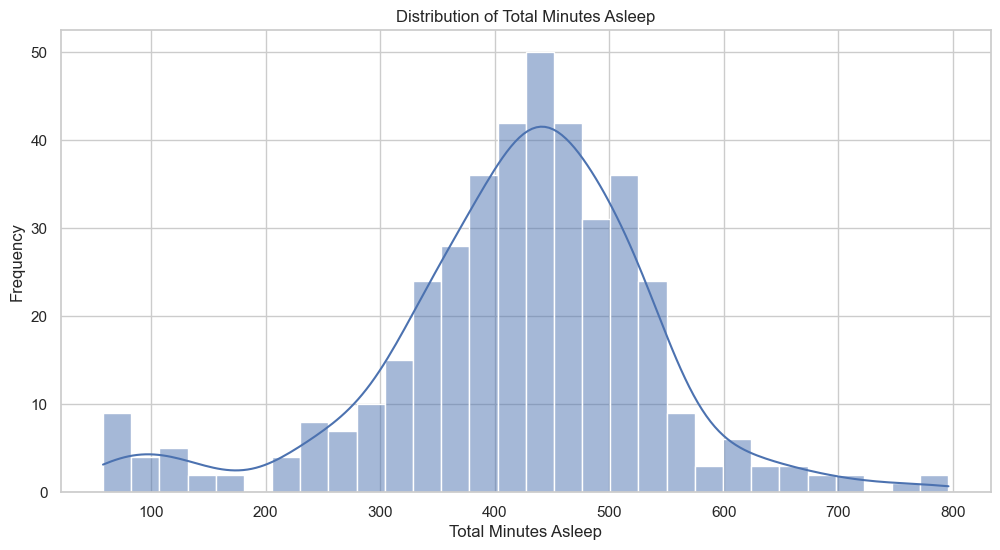

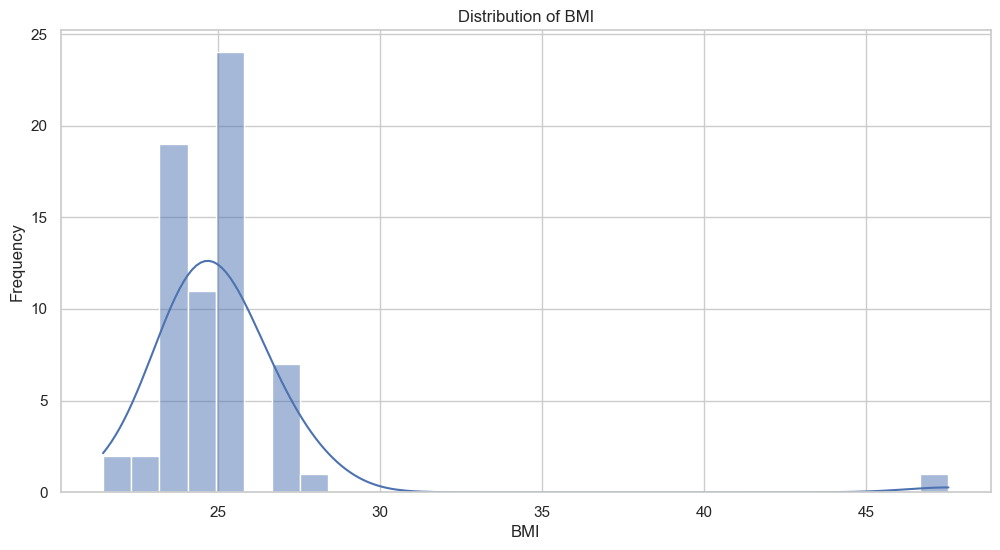

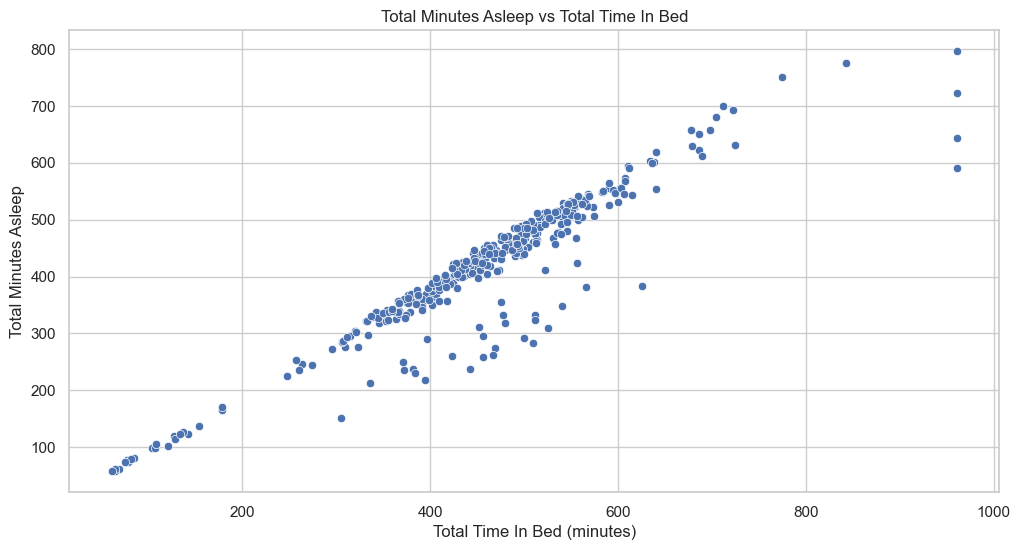

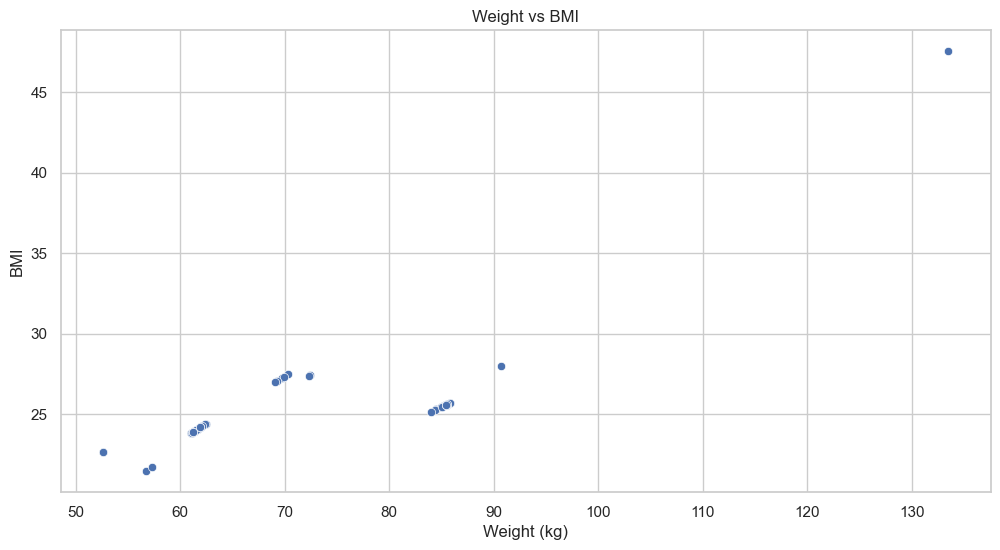

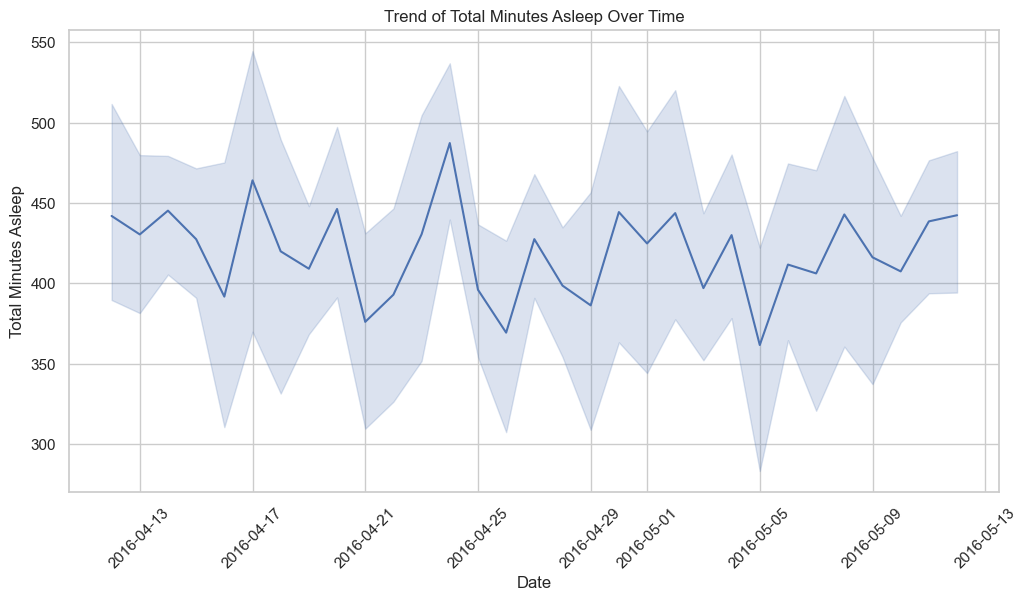

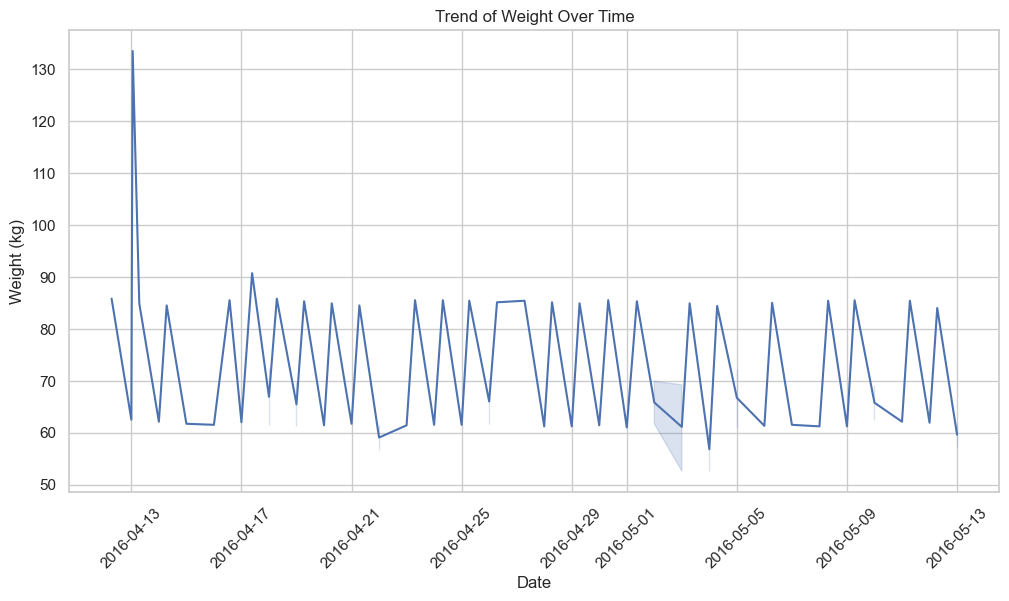

In [ ]:
sleep_data = sleep_data.drop_duplicates()

In [37]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
daily_steps["ActivityDay"] = pd.to_datetime(daily_steps["ActivityDay"])
daily_calories["ActivityDay"] = pd.to_datetime(daily_calories["ActivityDay"])
sleep_data["SleepDay"] = pd.to_datetime(sleep_data["SleepDay"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"])
weight_data["Date"] = pd.to_datetime(weight_data["Date"])


In [39]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


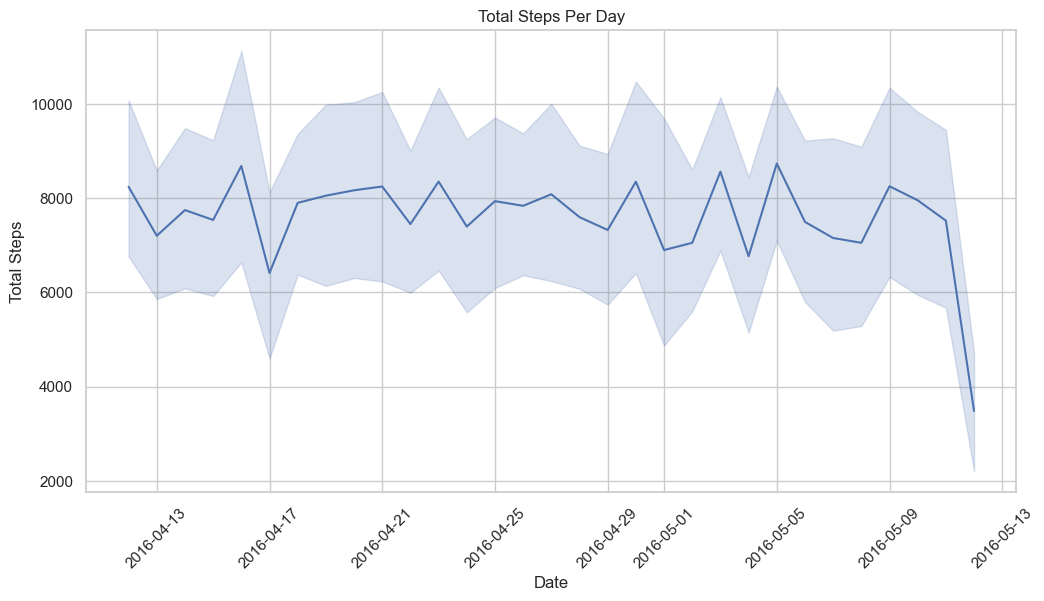

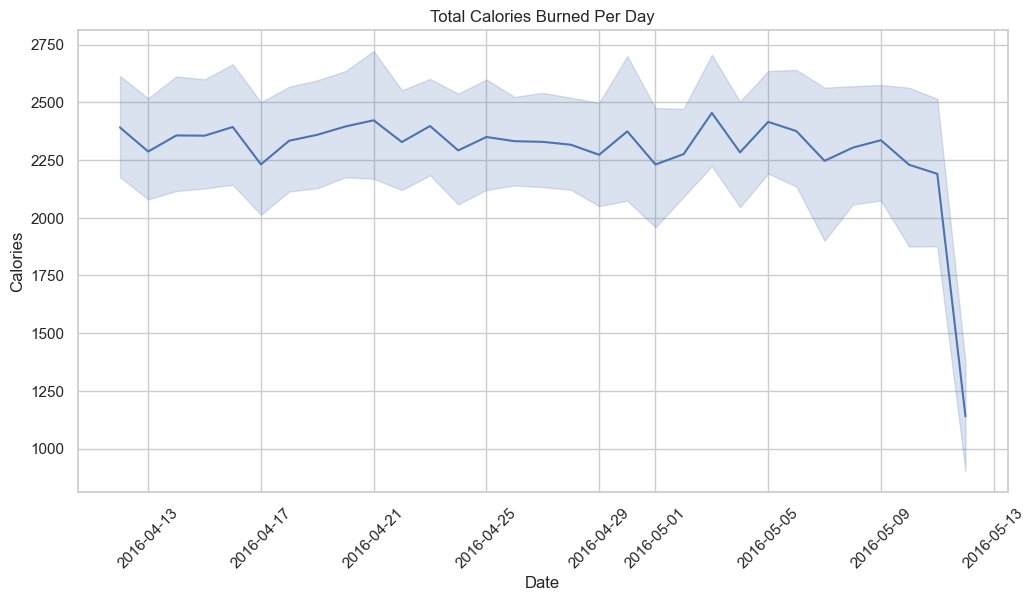

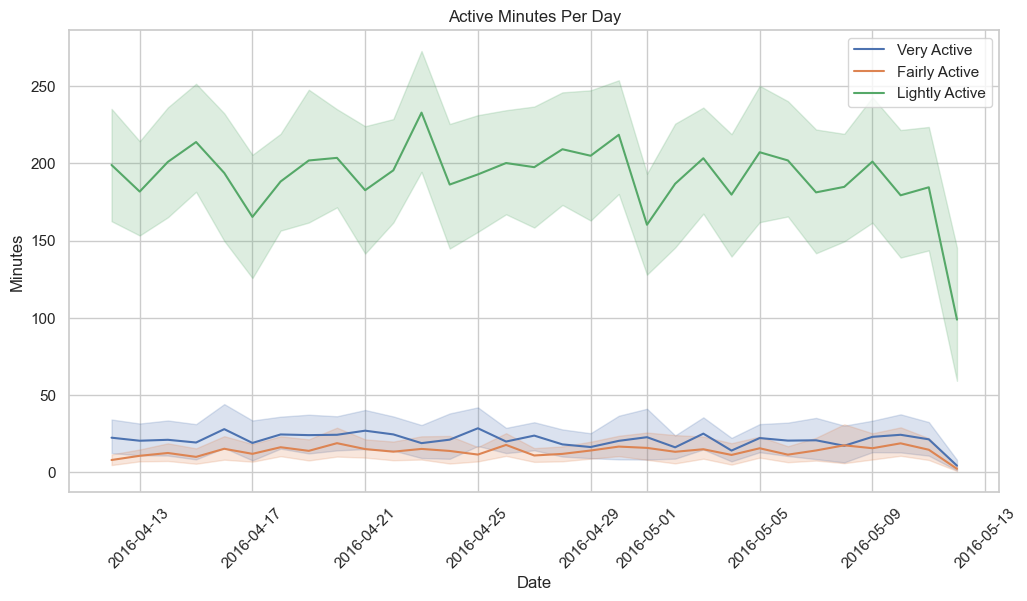

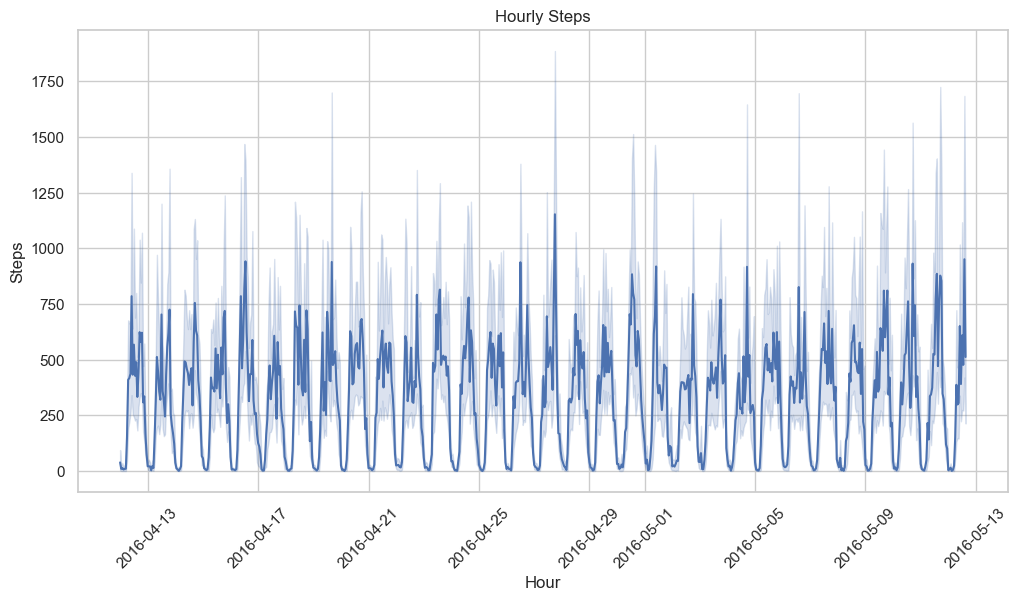

In [ ]:
daily_steps.head()

In [49]:
daily_steps.rename(columns={"ActivityDay": "ActivityDate"}, inplace=True)
daily_calories.rename(columns={"ActivityDay": "ActivityDate"}, inplace=True)
sleep_data.rename(columns={"ActivityDate":"SleepDay"}, inplace=True)

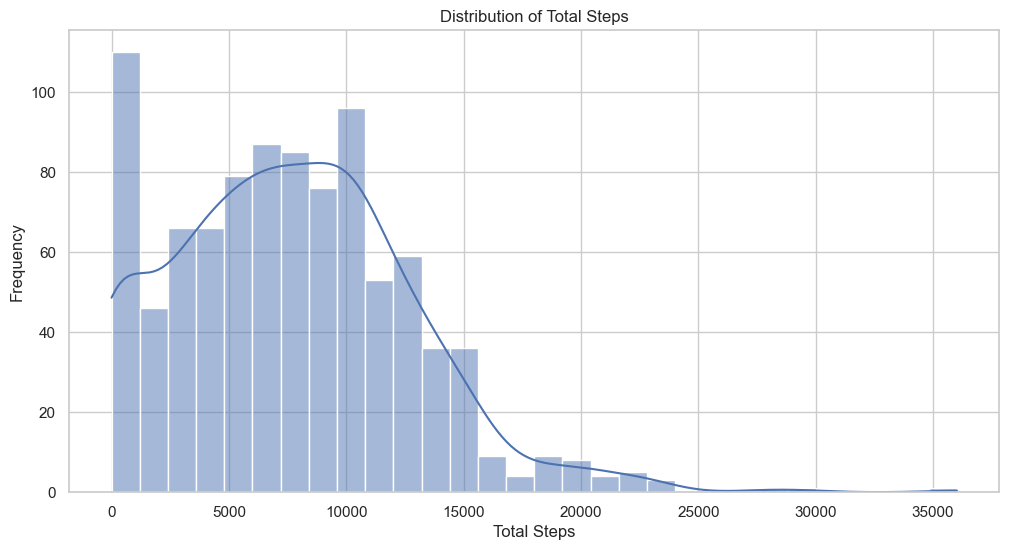

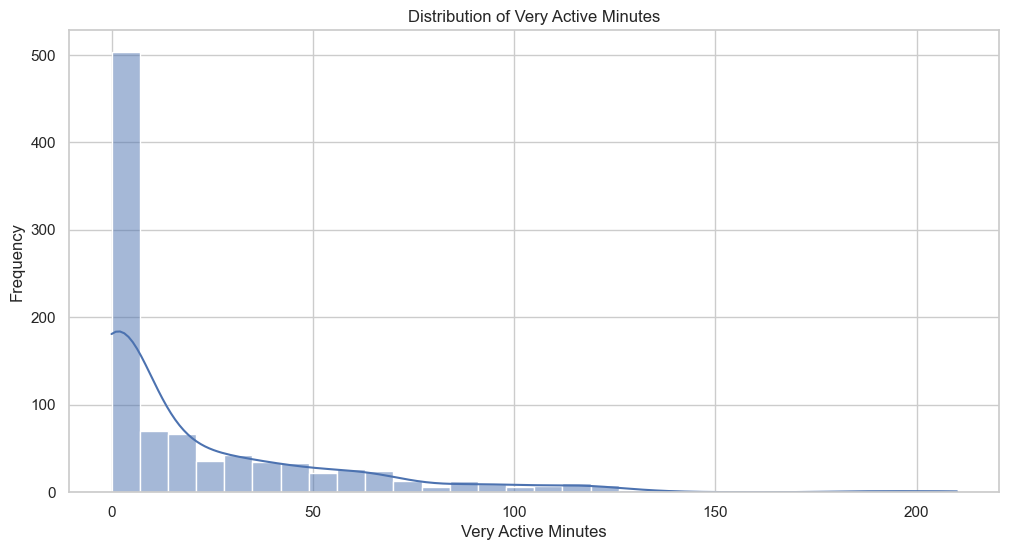

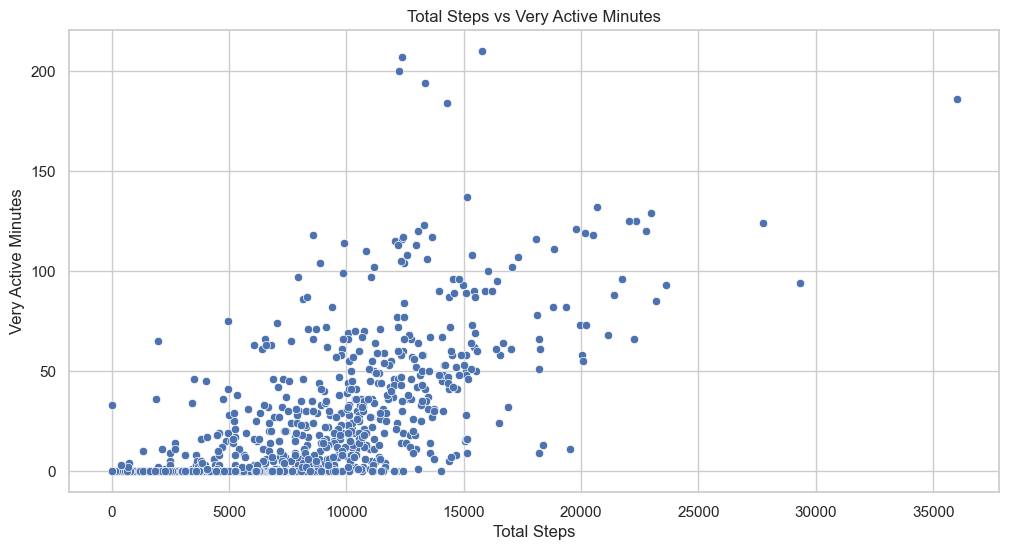

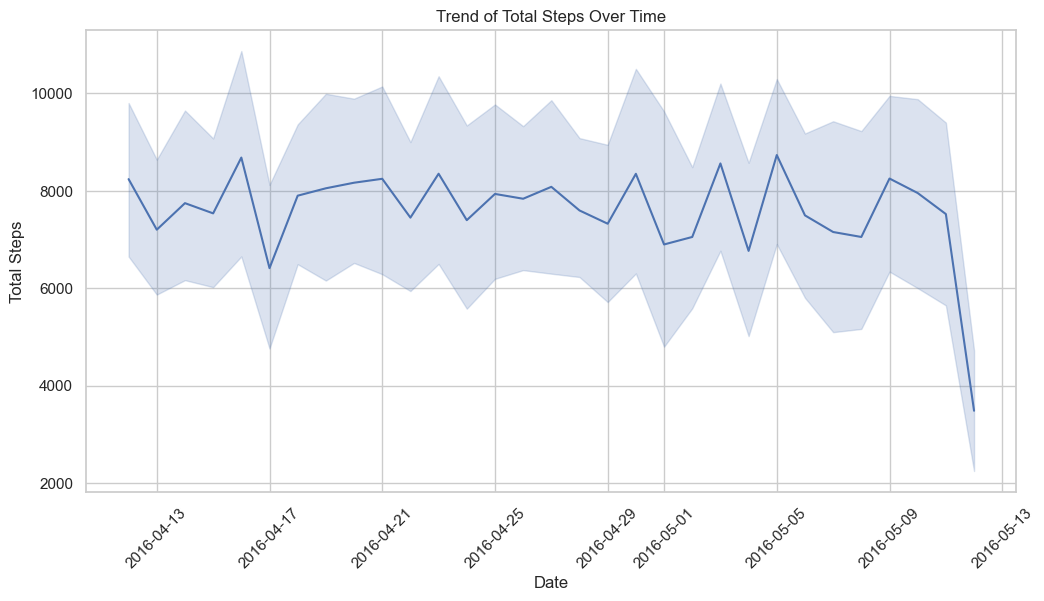

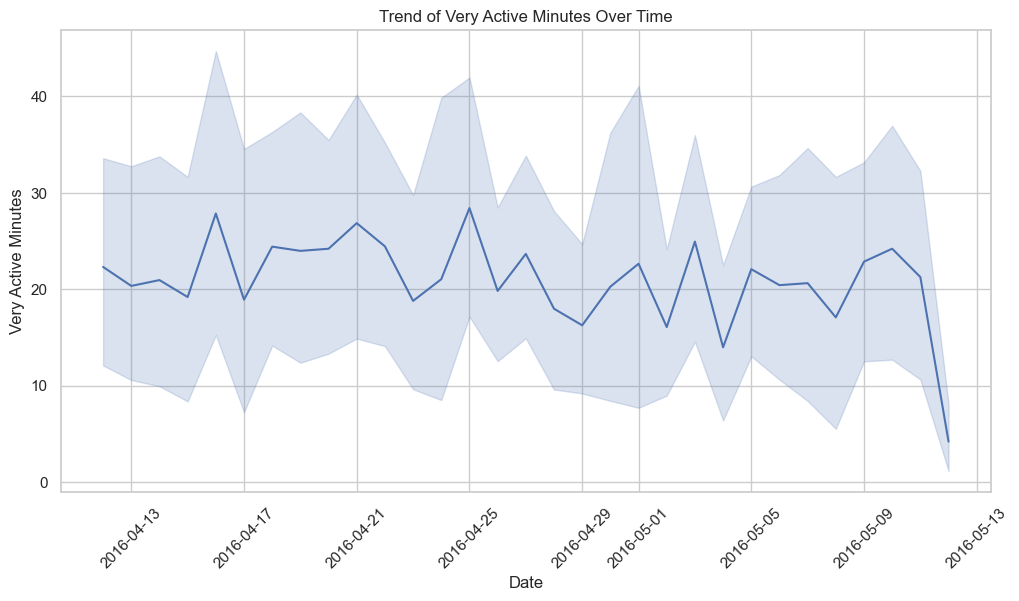

In [ ]:
df_merged = daily_activity.merge(daily_steps, on=["Id", "ActivityDate"], how="inner")
df_merged = df_merged.merge(daily_calories, on=["Id", "ActivityDate"], how="inner")
df_merged = df_merged.merge(sleep_data, left_on=["Id", "ActivityDate"], right_on=["Id", "SleepDay"], how="left") # Left join since not everyone has sleep data


In [52]:
df_merged.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories_x,StepTotal,Calories_y,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,13162,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,10735,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,1776,10460,1776,NaT,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,9762,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,12669,1863,2016-04-16,2.0,340.0,367.0


In [ ]:
df_merged.shape

In [ ]:
df_merged.info()

In [ ]:
df_merged.isnull().sum()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,VeryActiveMinutes_y,SedentaryActiveDistance_y,LightActiveDistance_y,ModeratelyActiveDistance_y,VeryActiveDistance_y,SleepDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date_y
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,...,25,0.00,6.06,0.55,1.88,2016-04-12,1.0,327.0,346.0,2016-04-12
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,...,21,0.00,4.71,0.69,1.57,2016-04-13,2.0,384.0,407.0,2016-04-13
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,...,30,0.00,3.91,0.40,2.44,NaT,NaN,NaN,NaN,NaT
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,...,29,0.00,2.83,1.26,2.14,2016-04-15,1.0,412.0,442.0,2016-04-15
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,...,36,0.00,5.04,0.41,2.71,2016-04-16,2.0,340.0,367.0,2016-04-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,17,0.00,6.80,0.20,1.08,NaT,NaN,NaN,NaN,NaT
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,73,0.05,6.24,0.80,11.10,NaT,NaN,NaN,NaN,NaT
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,18,0.00,6.28,0.46,1.35,NaT,NaN,NaN,NaN,NaT
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,88,0.00,5.89,0.41,13.22,NaT,NaN,NaN,NaN,NaT


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,LightActiveDistance,StepTotal,Calories,...,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,ModeratelyActiveDistance,VeryActiveDistance,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActiveMinutes,TaskCompletion
0,1503960366,2016-04-12,13162,8.49,8.500000,0.0,1.88,6.06,13162,1985,...,13,25,0.00,0.55,1.88,1.000000,327.000000,346.000000,366,1
1,1503960366,2016-04-13,10735,6.97,6.970000,0.0,1.57,4.71,10735,1797,...,19,21,0.00,0.69,1.57,2.000000,384.000000,407.000000,257,1
2,1503960366,2016-04-14,10460,6.75,6.740000,0.0,2.44,3.91,10460,1776,...,11,30,0.00,0.40,2.44,1.119512,419.173171,458.482927,222,1
3,1503960366,2016-04-15,9762,6.23,6.280000,0.0,2.14,2.83,9762,1745,...,34,29,0.00,1.26,2.14,1.000000,412.000000,442.000000,272,0
4,1503960366,2016-04-16,12669,8.16,8.160000,0.0,2.71,5.04,12669,1863,...,10,36,0.00,0.41,2.71,2.000000,340.000000,367.000000,267,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.08,8.110000,0.0,1.08,6.80,10686,2847,...,4,17,0.00,0.20,1.08,1.119512,419.173171,458.482927,266,1
936,8877689391,2016-05-09,20226,18.14,18.250000,0.0,11.10,6.24,20226,3710,...,19,73,0.05,0.80,11.10,1.119512,419.173171,458.482927,309,1
937,8877689391,2016-05-10,10733,8.09,8.150000,0.0,1.35,6.28,10733,2832,...,11,18,0.00,0.46,1.35,1.119512,419.173171,458.482927,253,1
938,8877689391,2016-05-11,21420,19.52,19.559999,0.0,13.22,5.89,21420,3832,...,12,88,0.00,0.41,13.22,1.119512,419.173171,458.482927,313,1


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [198]:
# Select features and target variable
features = ['TotalSteps', 'Calories', 'ActiveMinutes', 'TotalDistance', 'TotalMinutesAsleep']
X = df_merged[features]
y = df_merged['TaskCompletion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [200]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}